# Diabetes prediction


In [17]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Data Reading from CSV file


In [4]:
data = pd.read_csv("diabetes.csv")

In [100]:
print(data.shape)  #printing number of rows and column in data
data  #printing dataset

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [101]:
data.head()  #printing first 5 rows from dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
data.tail()  #printing last 5 rows from dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
data.shape  #print rows and column in dataset

(768, 9)

In [10]:
data.describe()  #getting the statistical measure from data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [103]:
#separating the data and its labels
X = data.drop(columns = 'Outcome', axis = 1)
Y = data['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Visualising Data

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

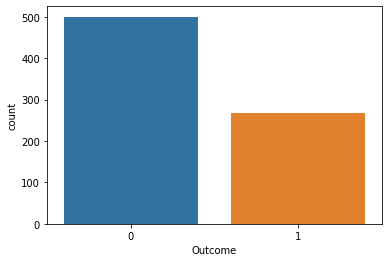

In [31]:
sb.countplot(data= data , x = 'Outcome');
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '17')])

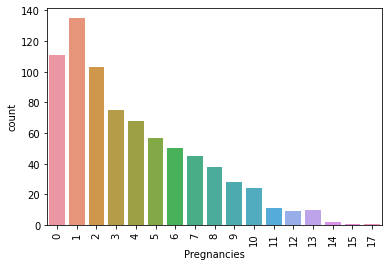

In [41]:
sb.countplot(data = data, x = 'Pregnancies')
plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135]),
 [Text(0, 0, '0'),
  Text(1, 0, '44'),
  Text(2, 0, '56'),
  Text(3, 0, '57'),
  Text(4, 0, '61'),
  Text(5, 0, '62'),
  Text(6, 0, '65'),
  Text(7, 0, '67'),
  Text(8, 0, '68'),
  Text(9, 0, '71'),
  Text(10, 0, '72'),
  Text(11,

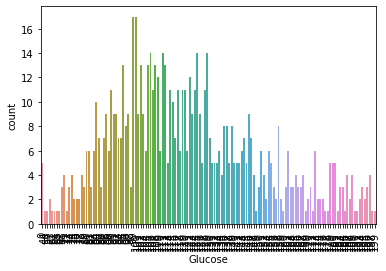

In [43]:
sb.countplot(data = data, x = 'Glucose')
plt.xticks(rotation = 90)

0    500
1    268
Name: Outcome, dtype: int64


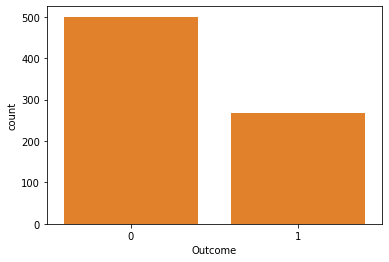

In [47]:
base_color = sb.color_palette()[1]
gen_order = data['Outcome'].value_counts().index
sb.countplot(data = data, x = 'Outcome', color = base_color,
            order = gen_order)
print(data['Outcome'].value_counts())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '17')])

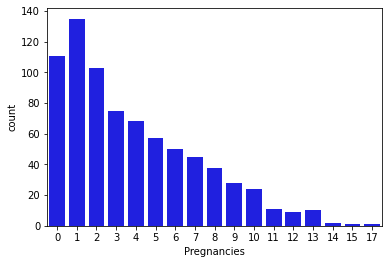

In [50]:
base_color = sb.color_palette()[2]
sb.countplot(data = data, x = 'Pregnancies', color = 'blue')

plt.xticks(rotation = 0)

<AxesSubplot:xlabel='count', ylabel='Pregnancies'>

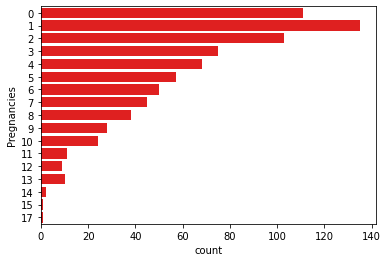

In [51]:
base_color = sb.color_palette()[2]
sb.countplot(data = data, y= 'Pregnancies', color = 'red')

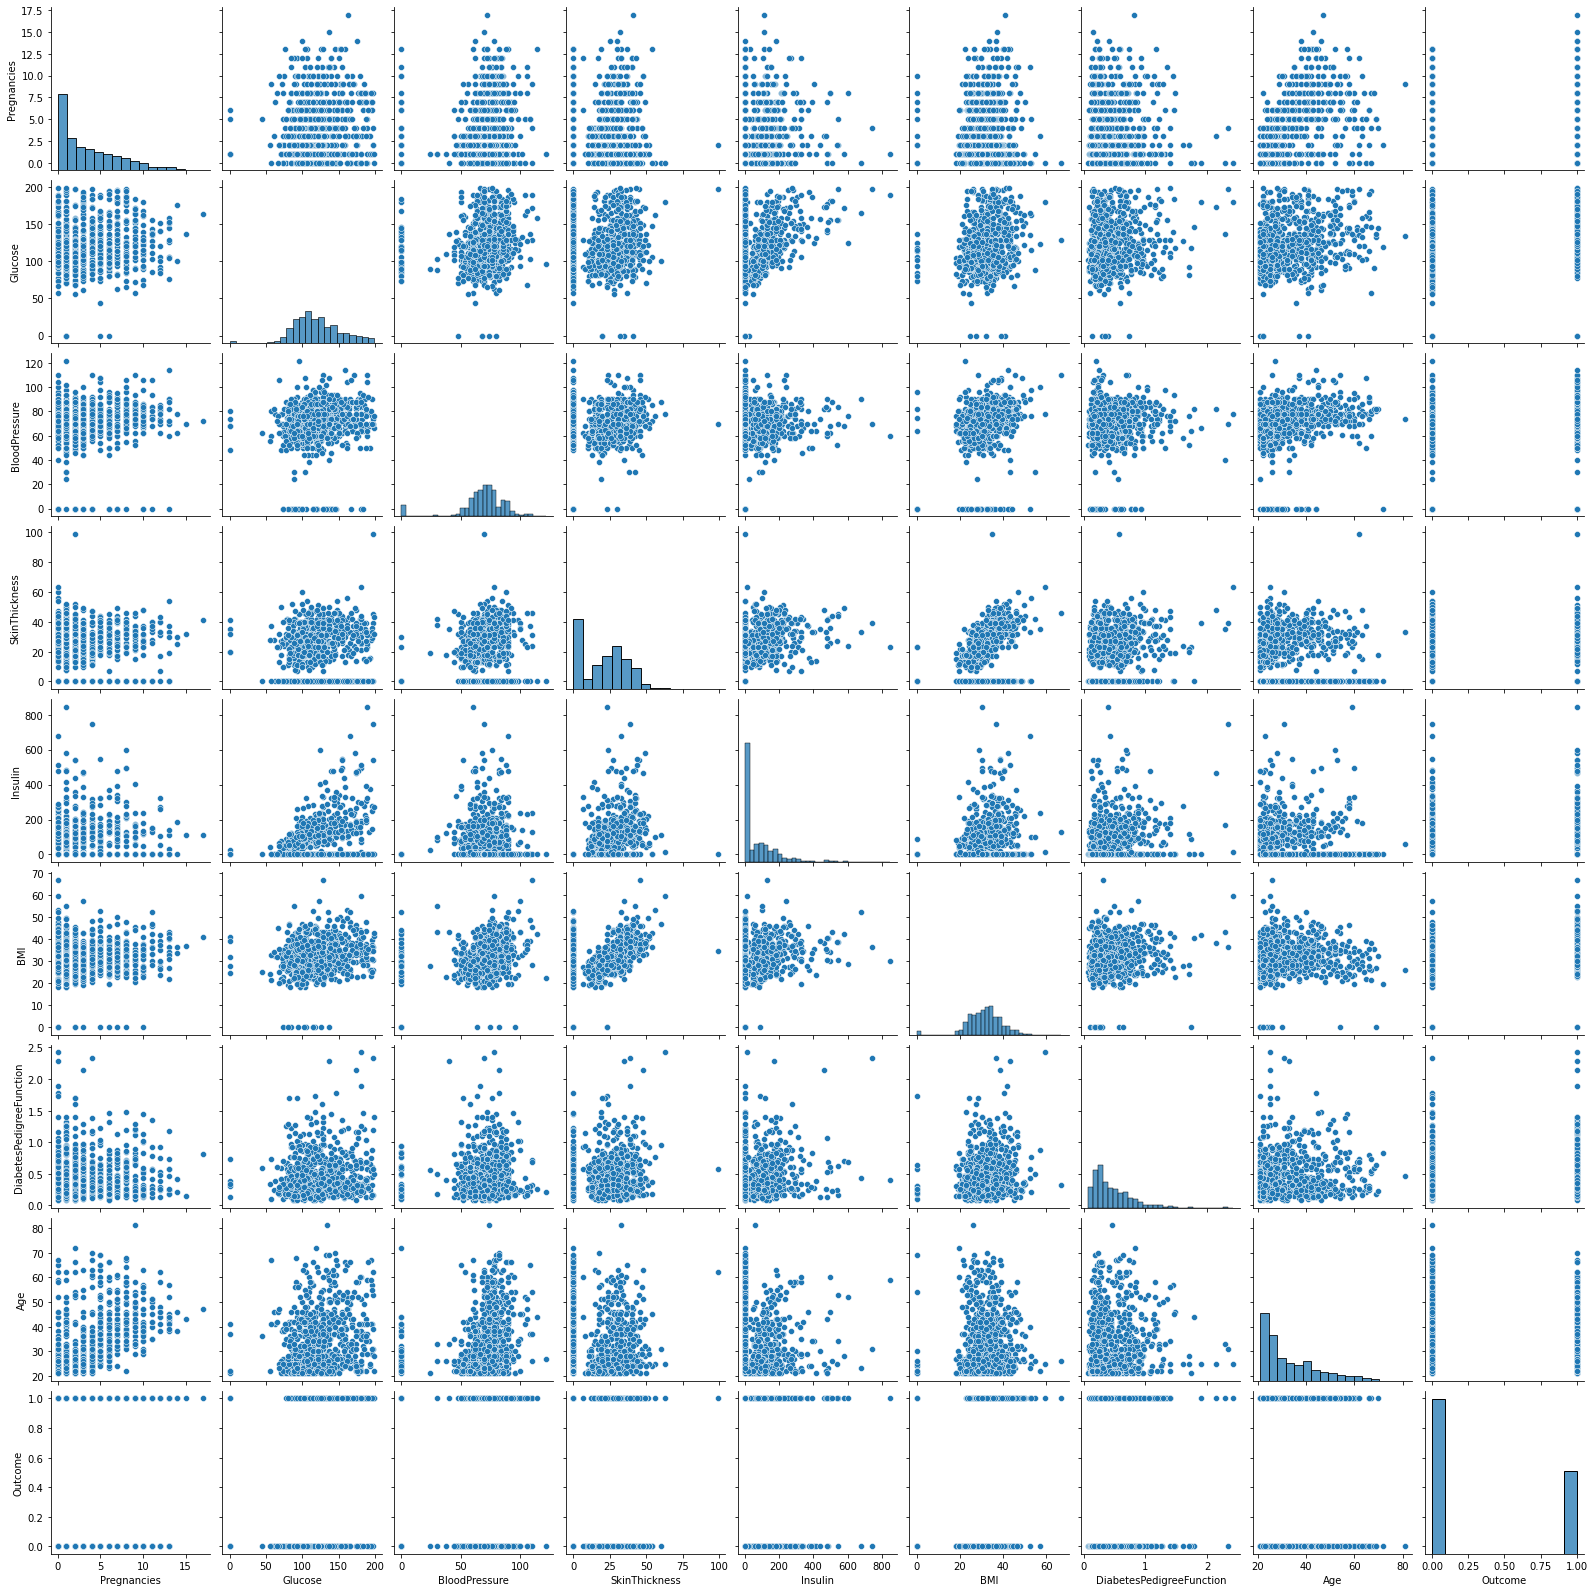

In [52]:
sb.pairplot(data)

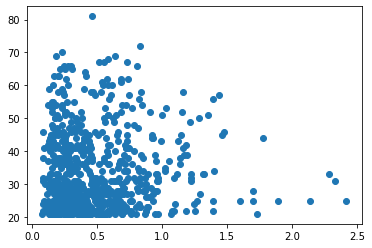

In [62]:
plt.scatter(data = data, x = 'DiabetesPedigreeFunction', y = 'Age')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Age'>

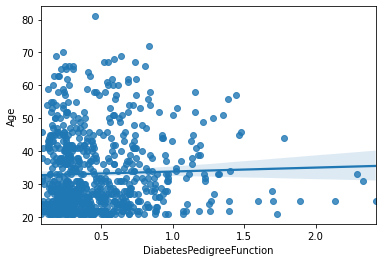

In [64]:
sb.regplot(data = data, x= 'DiabetesPedigreeFunction', y='Age')

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

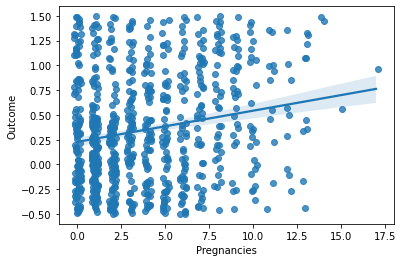

In [66]:
sb.regplot(data = data, x= 'Pregnancies', y= 'Outcome', x_jitter= 0.2, y_jitter = 0.5)

Text(0, 0.5, 'Glucose')

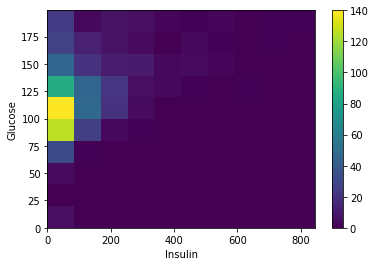

In [104]:
plt.hist2d(data= data, x = 'Insulin', y = 'Glucose')
plt.colorbar()
plt.xlabel('Insulin')
plt.ylabel('Glucose')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '17')])

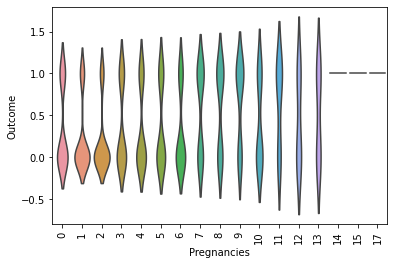

In [82]:
sb.violinplot(data = data , x = 'Pregnancies', y = 'Outcome', inner = None)
plt.xticks(rotation = 90)

<AxesSubplot:>

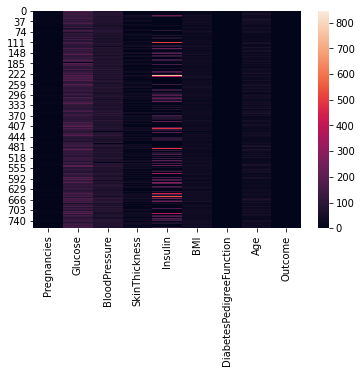

In [85]:
sb.heatmap(data)

<AxesSubplot:>

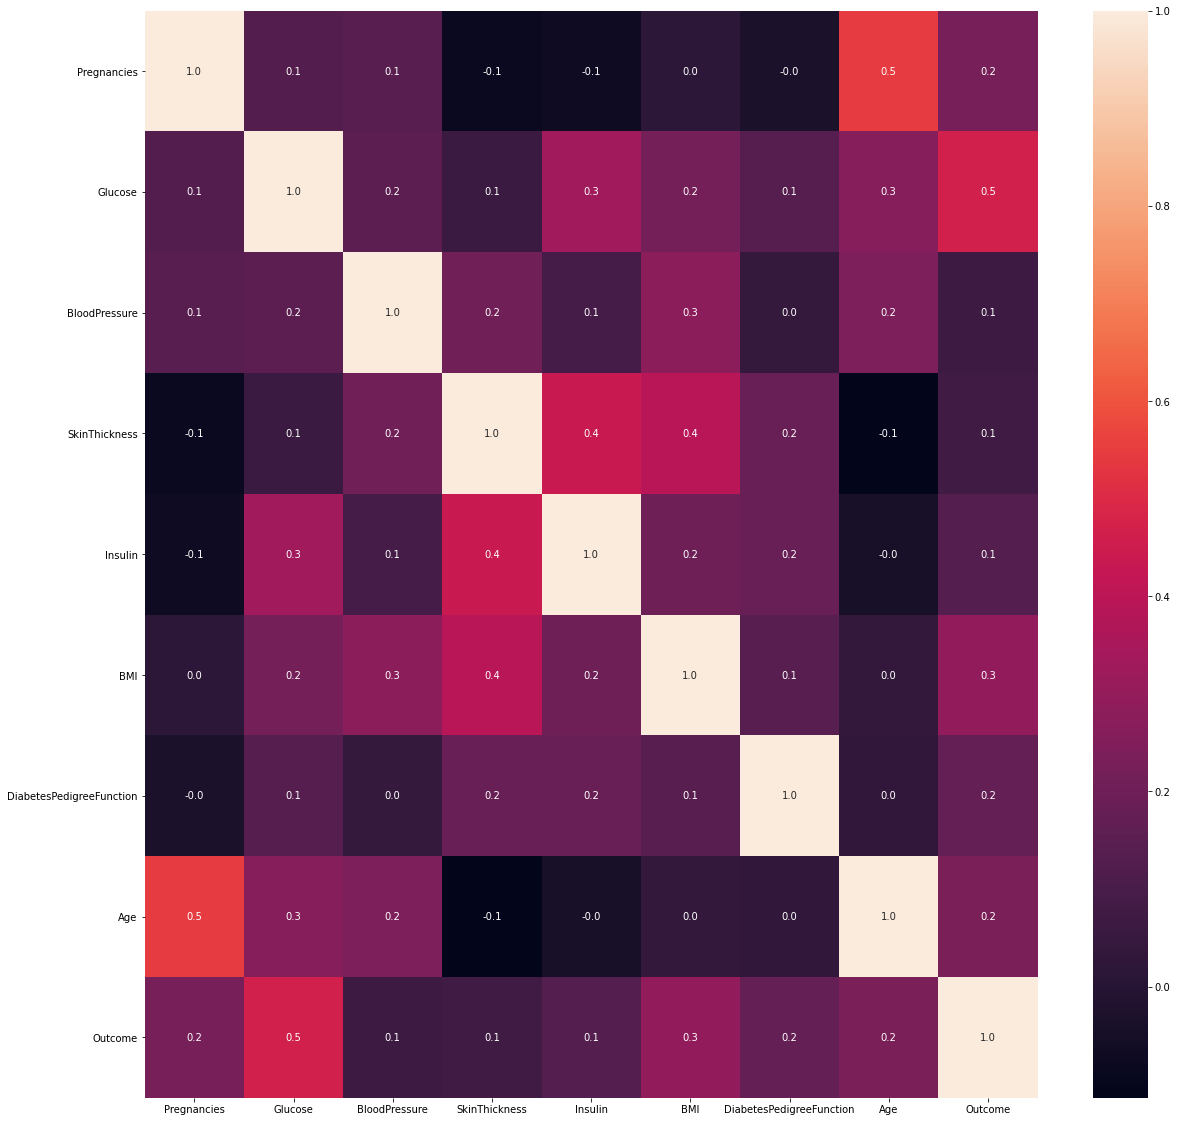

In [105]:
plt.figure(figsize = (20,20))
sb.heatmap(data.corr(), annot = True, fmt = '0.1f')

In [90]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

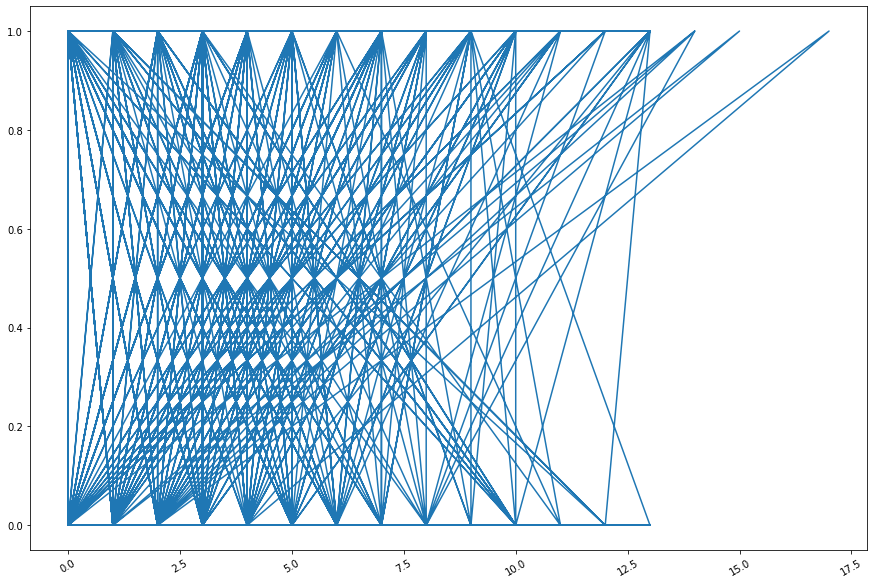

In [96]:
plt.figure(figsize= (15,10))
plt.errorbar(data = data, x= 'Pregnancies', y = 'Outcome')
plt.xticks(rotation = 30)

# Data Standardization

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X)

StandardScaler()

In [27]:
standardized_data = scaler.transform(X)

In [28]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [29]:
X = standardized_data
Y = data['Outcome']

In [30]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Test Train Split

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, stratify = Y, random_state = 2)

In [110]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the Model

In [107]:
classifer = svm.SVC(kernel = 'linear')

In [111]:
#training the support vector Machine classifier
classifer.fit(X_train,Y_train) 

SVC(kernel='linear')

# Model Evaluation



# Accuracy  Score

In [46]:
#accuracy score on the training data
X_train_prediction = classifer.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.7866449511400652


In [49]:
#accuracy score on the test data
X_test_prediction = classifer.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.7727272727272727


# Making a predictive system

In [91]:
input_data = (1,103,80,11,82,19.4,0.491,22,)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifer.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -0.56004775  0.56322275 -0.59820354  0.01910689 -1.59824051
   0.05775584 -0.95646168]]
[0]
The person is not diabetic
